# Data processing
This notebook implements dataset changes and modifications such as
- Data cleaning (null and empty string values)
- GDPR protection
- merge data
- data analysis

It basically prepares dataset for anotation using prodi.gy

In [72]:
# imports

import json
import os
import matplotlib.pyplot as plt
from print_dict import pd

#### variable declaration

In [73]:
basePath = 'Facebook/outputs/parts'
nameDict= {}
finalData= []

## Opening parts of the dataset

In [74]:
def openJson(filename):
    with open(os.path.join(os.getcwd(), basePath, filename)) as json_file:
        return json.load(json_file)

### Politicians

In [75]:
robertFico= openJson("robert_fico_data.json")
igorMatovic= openJson("igor_matovic_data.json")
erikKalinak= openJson("erik_kaliňák_data.json")
zuzanaCaputova= openJson("zuzana_čaputová_data.json")
marianKotleba= openJson("marian_kotleba_data.json")

politicianNames = ['Robert Fico', 'Igor Matovic', 'Erik Kalinak', 'Zuzana Caputova', 'Marian Kotleba']

### Memes

In [76]:
zomri= openJson("zomri_data.json")
emefka= openJson("emefka_data.json")
okAleIdesPrvy= openJson("ok,ale_ideš_prvý_:d_data.json")

memeNames= ['Zomri', 'Emefka', 'OkAleIdesPrvy']

### Media

In [77]:
eva= openJson("eva_-_hriešne_dobrá_data.json")
aktuality= openJson("aktuality_data.json")
dennikN= openJson("denník_n_data.json")
tvJOJ= openJson("televízia_joj_data.json")

mediaNames= ['Eva', 'Aktuality', 'DennikN', 'tvJOJ']

### Famous people

In [78]:
peterMarcin= openJson("peter_marcin_data.json")
sajfa= openJson("sajfa_data.json")
janKolenik= openJson("ján_koleník_data.json")

famousNames = ['Peter Marcin', 'Sajfa', 'Jan Kolenik']

### Sports

In [79]:
sport24= openJson("šport24_data.json")
dominikaCibulkova= openJson("dominika_cibulkova_data.json")
hetrik= openJson("hetrik_data.json")
RTVSsport= openJson("šport_v_rtvs_data.json")

sportsNames= ['Sport24', 'Dominika Cibulkova', 'Hetrik', 'RTVSsport']

## Dataset peek

Sample of the dataset might look like this:

    [
        {
            'publisher': Post author,
            'title': Text that autor published as a post,
            'post_reactions': Number of interactions with a post,
            'comments': [
                {
                    'publisher': Comment author,
                    'text': Comment's content,
                    'replies': [
                        {
                            'publisher': Reply author,
                            'text': Reply's content,
                            'replies': [
                                {
                                    'publisher': Second reply author,
                                    'text': Second reply's content
                                }
                            ]
                        }
                    ]
                }
            ]
        }
    ]

## Data recordings retrieval

In [80]:
def getNumOfRecords(dictObj):
    count= 0
    for post in dictObj:
        count+= 1
        for comment in post['comments']:
            count+= 1
            for reply in comment['replies']:
                count+= 1
                for sec_reply in reply['replies']:
                    count+= 1
    return count

## Junk data cleaning

This part of the code iterates through whole dataset and delete NULL or "" values.

In [81]:
def cleanData(dictObj):
    i = 0
    for post_idx, post in enumerate(dictObj):
        for comment_idx, comment in enumerate(post['comments']):
            try:
                if comment['text'] == '' or comment['text'] is None:
                    dictObj[post_idx]['comments'].remove(comment)
                    i += 1
            except:
                pass
            for reply_idx, reply in enumerate(comment['replies']):
                try:
                    if reply['text'] == '' or reply['text'] is None:
                        dictObj[post_idx]['comments'][comment_idx]['replies'].remove(reply)
                        i += 1
                except:
                    pass
                for sec_reply_idx, sec_reply in enumerate(reply['replies']):
                    try:
                        if sec_reply['text'] == '' or sec_reply['text'] is None:
                            dictObj[post_idx]['comments'][comment_idx]['replies'][reply_idx]['replies'].remove(sec_reply)
                            i += 1
                    except:
                        pass
    return dictObj, i

In [82]:
def cleanEntireData(dictObj):
    recordsDeleted= 0
    temp, i= cleanData(dictObj)
    recordsDeleted += i
    while i:
        temp, i= cleanData(dictObj)
        recordsDeleted += i
    return temp

## Data preparation for visualisation

In [83]:
categories= politicianNames + memeNames + mediaNames + sportsNames + famousNames
values= [
    getNumOfRecords(cleanEntireData(robertFico)),  # politics topppic
    getNumOfRecords(cleanEntireData(igorMatovic)),
    getNumOfRecords(cleanEntireData(erikKalinak)),
    getNumOfRecords(cleanEntireData(zuzanaCaputova)),
    getNumOfRecords(cleanEntireData(marianKotleba)),

    getNumOfRecords(cleanEntireData(zomri)),  # meme toppic
    getNumOfRecords(cleanEntireData(emefka)),
    getNumOfRecords(cleanEntireData(okAleIdesPrvy)),

    getNumOfRecords(cleanEntireData(eva)),  # media toppic
    getNumOfRecords(cleanEntireData(aktuality)),
    getNumOfRecords(cleanEntireData(dennikN)),
    getNumOfRecords(cleanEntireData(tvJOJ)),

    getNumOfRecords(cleanEntireData(sport24)),  # sports toppic
    getNumOfRecords(cleanEntireData(dominikaCibulkova)),
    getNumOfRecords(cleanEntireData(hetrik)),
    getNumOfRecords(cleanEntireData(RTVSsport)),

    getNumOfRecords(cleanEntireData(peterMarcin)), # famous people toppic
    getNumOfRecords(cleanEntireData(sajfa)),
    getNumOfRecords(cleanEntireData(janKolenik))
]

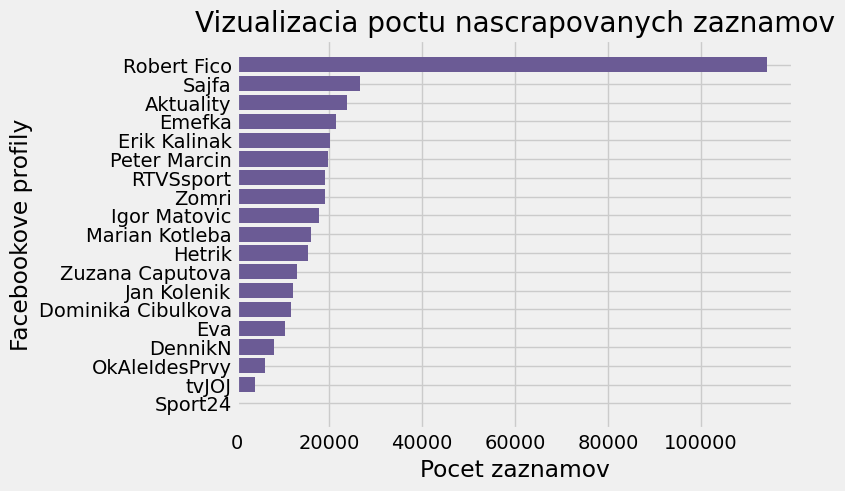

In [84]:
# Zoradenie hodnôt a zarovnanie poľa
zoradene = sorted(zip(values, categories))

# Rozdelenie zoradených hodnôt na nové polia
sortedValues, sortedCategories = zip(*zoradene)


plt.barh(sortedCategories, sortedValues, color= '#6b5b95')
plt.style.use('fivethirtyeight')
# Přidání popisků
plt.xlabel('Pocet zaznamov')
plt.ylabel('Facebookove profily')

plt.title('Vizualizacia poctu nascrapovanych zaznamov')

# # Zobrazení grafu
plt.show()

In [85]:
politiciansTotalRecords= sum(values[:5])
memeTotalRedcords= sum(values[5:8])
mediaTotalRecords= sum(values[8:12])
sportsTotalRecords= sum(values[12:16])
famousTotalRecords= sum(values[16:20])
totalRecords= sum(values)

In [86]:
def showPie(title, records):
    plt.pie(records,

        labels=[
               'Politician',
               'Meme',
               'Media',
               'Sports',
                'Famous people'
           ],
        wedgeprops={
         'edgecolor': 'black'   
        },
        colors=[
            "#ffb400", 
            "#d2980d", 
            "#a57c1b", 
            "#786028",
            "#724545"
        ],
        autopct='%1.1f%%'
           )
    plt.title(title)
    plt.tight_layout()
    plt.show()

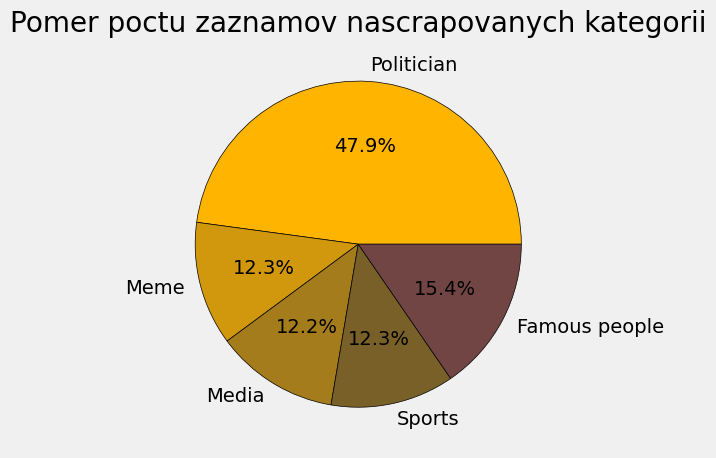

In [87]:
scrapedToppicRatio= [
        politiciansTotalRecords,
        memeTotalRedcords,
        mediaTotalRecords,
        sportsTotalRecords,
        famousTotalRecords
    ]

showPie('Pomer poctu zaznamov nascrapovanych kategorii', scrapedToppicRatio)

In [88]:
f"Total number of scraped records is {totalRecords}."

'Total number of scraped records is 378677.'

## Dataset merge

### meme toppic

In [89]:
memesFinal = []

memesFinal= zomri.copy()
memesFinal.extend(emefka)

finalMemeRecords= getNumOfRecords(memesFinal)

### media toppic

In [90]:
mediaFinal = []

mediaFinal= aktuality.copy()
mediaFinal.extend(dennikN)
mediaFinal.extend(eva[1:])
mediaFinal.extend(tvJOJ)

finalMediaRecords= getNumOfRecords(mediaFinal)

### sports toppic

In [91]:
sportsFinal= []

sportsFinal= dominikaCibulkova.copy()
sportsFinal.extend(RTVSsport)
sportsFinal.extend(sport24)
sportsFinal.extend(hetrik)

finalSportsRecords= getNumOfRecords(sportsFinal)

### famous people toppic

In [92]:
famousFinal= []

famousFinal= peterMarcin.copy()
famousFinal.extend(janKolenik)
famousFinal.extend(sajfa)

finalFamousRecords= getNumOfRecords(famousFinal)

### politics toppic

In [93]:
politicsFinal= []

politicsFinal= marianKotleba.copy()
politicsFinal.extend(zuzanaCaputova)
politicsFinal.extend(erikKalinak[:25])
politicsFinal.extend(igorMatovic)
politicsFinal.extend(robertFico[:40])

finalPoliticsRecords= getNumOfRecords(politicsFinal)

### Merge data

In [94]:
finalData = famousFinal.copy()
finalData.extend(politicsFinal)
finalData.extend(mediaFinal)
finalData.extend(memesFinal)
finalData.extend(sportsFinal)

In [95]:
len(finalData)

1736

## Dataset toppic ratio visualisation

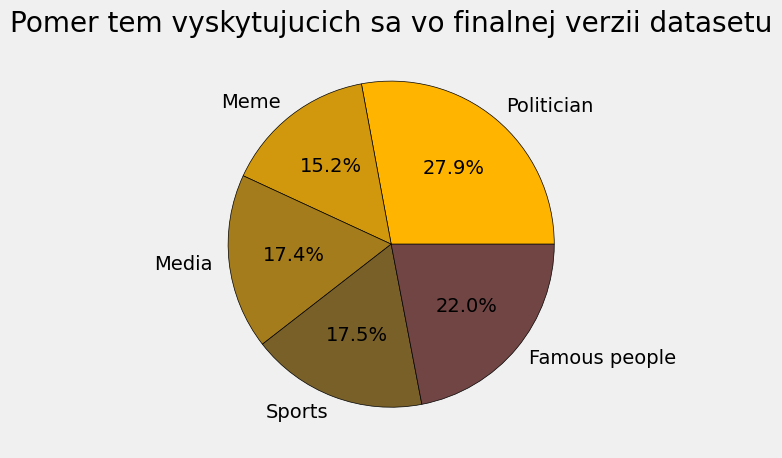

In [96]:
finalDatasetToppicRatio = [
    finalPoliticsRecords,
    finalMemeRecords,
    finalMediaRecords,
    finalSportsRecords,
    finalFamousRecords
]
showPie("Pomer tem vyskytujucich sa vo finalnej verzii datasetu", finalDatasetToppicRatio)

## GDPR protection

Down there is an implementation of anonymizing data, rename all names from format "Jozko Mrkvicka" to "user1"

In [97]:
def protectGDPR(dictObj):
    usr_idx = 1
    for post_idx, post in enumerate(dictObj):
        if post['publisher'] not in nameDict:
            nameDict[post['publisher']] = f'<user{usr_idx}>'
            usr_idx+= 1
        if post['publisher'] in nameDict:
            dictObj[post_idx]['publisher'] = nameDict[post['publisher']]
        for comment_idx, comment in enumerate(post['comments']):
            if comment['publisher'] not in nameDict:
                nameDict[comment['publisher']] = f'<user{usr_idx}>'
                usr_idx+= 1
            if comment['publisher'] in nameDict:
                dictObj[post_idx]['comments'][comment_idx]['publisher'] = nameDict[comment['publisher']]
            
            for item, value in nameDict.items():
                comment['text'] = comment['text'].replace(item, value)
            
            for reply_idx, reply in enumerate(comment['replies']):
                if reply['publisher'] not in nameDict:
                    nameDict[reply['publisher']] = f'<user{usr_idx}>'
                    usr_idx+= 1
                if reply['publisher'] in nameDict:
                    dictObj[post_idx]['comments'][comment_idx]['replies'][reply_idx]['publisher'] = nameDict[reply['publisher']]
                
                for item, value in nameDict.items():
                    reply['text'] = reply['text'].replace(item, value)
                
                for sec_reply_idx, sec_reply in enumerate(reply['replies']):
                    if sec_reply['publisher'] not in nameDict:
                        nameDict[sec_reply['publisher']] = f'<user{usr_idx}>'
                        usr_idx+= 1
                    if sec_reply['publisher'] in nameDict:
                        dictObj[post_idx]['comments'][comment_idx]['replies'][reply_idx]['replies'][sec_reply_idx]['publisher'] = nameDict[sec_reply['publisher']]
                    for item, value in nameDict.items():
                        sec_reply['text'] = sec_reply['text'].replace(item, value)
    
    return dictObj

In [98]:
finalData= protectGDPR(finalData)

## Delete blank mentions

In [100]:
def deleteMentions(dictObj):
    for post_idx, post in enumerate(dictObj):
        for comment_idx, comment in enumerate(post['comments']):
            try:
                if len(comment['text'].split()) == 1 and 'user' in comment['text']:
                    dictObj[post_idx]['comments'].remove(comment)
            except:
                pass
            for reply_idx, reply in enumerate(comment['replies']):
                try:
                    if len(reply['text'].split()) == 1 and 'user' in reply['text']:
                        dictObj[post_idx]['comments'][comment_idx]['replies'].remove(reply)
                except:
                    pass
                for sec_reply_idx, sec_reply in enumerate(reply['replies']):
                    try:
                        if len(sec_reply['text'].split()) == 1 and 'user' in sec_reply['text']:
                            dictObj[post_idx]['comments'][comment_idx]['replies'][reply_idx]['replies'].remove(sec_reply)
                    except:
                        pass
    return dictObj

In [101]:
finalDataset= deleteMentions(finalData)

## Final dataset version peek

Final structure of the dataset might look like this:

    [
        {
            'post_author': Post author,
            'title': Text that autor published as a post,
            'post_reactions': Number of interactions with a post,
            'sentiment': 1,
            'hateful': 0,
            'comments': [
                {
                    'comment_author': Comment author,
                    'text': Comment's content,
                    'sentiment': 1,
                    'hateful': 0,
                    'replies': [
                        {
                            'reply_author': Reply author,
                            'text': Reply's content,
                            'sentiment': 1,
                            'hateful': 0,
                            'replies': [
                                {
                                    'second_reply_author': Second reply author,
                                    'text': Second reply's content,
                                    'sentiment': 1,
                                    'hateful': 0
                                }
                            ]
                        }
                    ]
                }
            ]
        }
    ]

## Rename Label Fields

In [118]:
renamed_dataset = []
id = 1
for idx, post in enumerate(finalDataset):
    renamed_dataset.append({
        'id': id,
        'post_author': post['publisher'],
        'title': post['title'],
        'post_reactions': post['post_reactions'],
        'comments': []
    })
    id += 1
    for cmnt_idx, comment in enumerate(post['comments']):
        try:
            renamed_dataset[idx]['comments'].append({
                'id': id,
                'comment_author': comment['publisher'],
                'text': comment['text'],
                'replies': []
            })
            id += 1
        except KeyError as err:
            pass

        try:
            if len(comment['replies']):
                for repl_idx, reply in enumerate(comment['replies']):
                    renamed_dataset[idx]['comments'][cmnt_idx]['replies'].append({
                        'id': id,
                        'reply_author': reply['publisher'],
                        'text': reply['text'],
                        'replies': []
                    })
                    id += 1

                    if len(reply['replies']):

                        for sec_reply in reply['replies']:
                            renamed_dataset[idx]['comments'][cmnt_idx]['replies'][repl_idx]['replies'].append({
                                'id': id,
                                'second_reply_author': sec_reply['publisher'],
                                'text': sec_reply['text']
                            })
                            id += 1
                            
        except KeyError:
            pass

### Delete empty arrays

In [119]:
for idx, post in enumerate(renamed_dataset):
    for cmnt_idx, comment in enumerate(post['comments']):
        try:
           if not len(comment['replies']):
               del renamed_dataset[idx]['comments'][cmnt_idx]['replies']
        except KeyError as err:
            pass

        try:
            if len(comment['replies']):
                for repl_idx, reply in enumerate(comment['replies']):
                    if not len(reply['replies']):
                        del renamed_dataset[idx]['comments'][cmnt_idx]['replies'][repl_idx]['replies']
        except KeyError:
            pass

### Create JSON file

In [120]:
with open('Facebook/outputs/GDPR_v5.json', 'w', encoding= "utf-8") as file:
    json.dump(renamed_dataset, file, indent=4, separators=(',',': '))